Importing the Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Data Exploration and Processing

Importing Dataset

In [ ]:
df_at_beginning = pd.read_csv("agaricus-lepiota.data")
df_at_beginning

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


0. class: edible=e,poisonous=p
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [ ]:
df = pd.read_csv("agaricus-lepiota.data", header = None,  names=['class',	'cap-shape',	'cap-surface',	'cap-color',	'bruises',	'odor',	'gill-attachment',
    'gill-spacing',	'gill-size',	'gill-color',	'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 	'stalk-surface-below-ring','stalk-color-above-ring',
    'stalk-color-below-ring',	'veil-type',	'veil-color', 'ring-number',	'ring-type',	'spore-print-color',	'population',	'habitat' ])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Description of Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Checking for nulls

In [ ]:
print(df.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [ ]:
print(df.isna().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [ ]:
for col in df.columns:
  print(col)
  print(np.sort(pd.unique(df[col])))

class
['e' 'p']
cap-shape
['b' 'c' 'f' 'k' 's' 'x']
cap-surface
['f' 'g' 's' 'y']
cap-color
['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises
['f' 't']
odor
['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment
['a' 'f']
gill-spacing
['c' 'w']
gill-size
['b' 'n']
gill-color
['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape
['e' 't']
stalk-root
['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring
['f' 'k' 's' 'y']
stalk-surface-below-ring
['f' 'k' 's' 'y']
stalk-color-above-ring
['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring
['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type
['p']
veil-color
['n' 'o' 'w' 'y']
ring-number
['n' 'o' 't']
ring-type
['e' 'f' 'l' 'n' 'p']
spore-print-color
['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population
['a' 'c' 'n' 's' 'v' 'y']
habitat
['d' 'g' 'l' 'm' 'p' 'u' 'w']


Checking for duplicates

In [ ]:
len(df[df.duplicated()])

0

Replacing incorrect data with NaN

In [ ]:
df = df.replace('?', np.NaN)

In [ ]:
print(df.isna().sum())

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (8124, 23)


In [ ]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


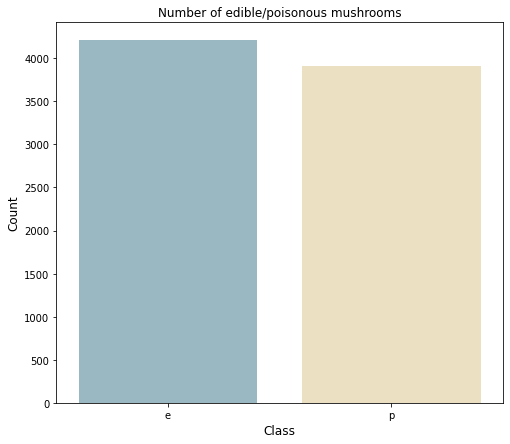

In [ ]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="blend:#7AB,#EDA")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of edible/poisonous mushrooms')
plt.show()

In [ ]:
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

Encoding categorical data

In [ ]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [ ]:
for col in df.columns:
  print(col)
  print(np.sort(pd.unique(df[col])))

class
[0 1]
cap-shape
[0 1 2 3 4 5]
cap-surface
[0 1 2 3]
cap-color
[0 1 2 3 4 5 6 7 8 9]
bruises
[0 1]
odor
[0 1 2 3 4 5 6 7 8]
gill-attachment
[0 1]
gill-spacing
[0 1]
gill-size
[0 1]
gill-color
[ 0  1  2  3  4  5  6  7  8  9 10 11]
stalk-shape
[0 1]
stalk-root
[0 1 2 3 4]
stalk-surface-above-ring
[0 1 2 3]
stalk-surface-below-ring
[0 1 2 3]
stalk-color-above-ring
[0 1 2 3 4 5 6 7 8]
stalk-color-below-ring
[0 1 2 3 4 5 6 7 8]
veil-type
[0]
veil-color
[0 1 2 3]
ring-number
[0 1 2]
ring-type
[0 1 2 3 4]
spore-print-color
[0 1 2 3 4 5 6 7 8]
population
[0 1 2 3 4 5]
habitat
[0 1 2 3 4 5 6]


Veil type has only one value so it can be droped

In [ ]:
df=df.drop(["veil-type"],axis=1)

Correlation of the attributes

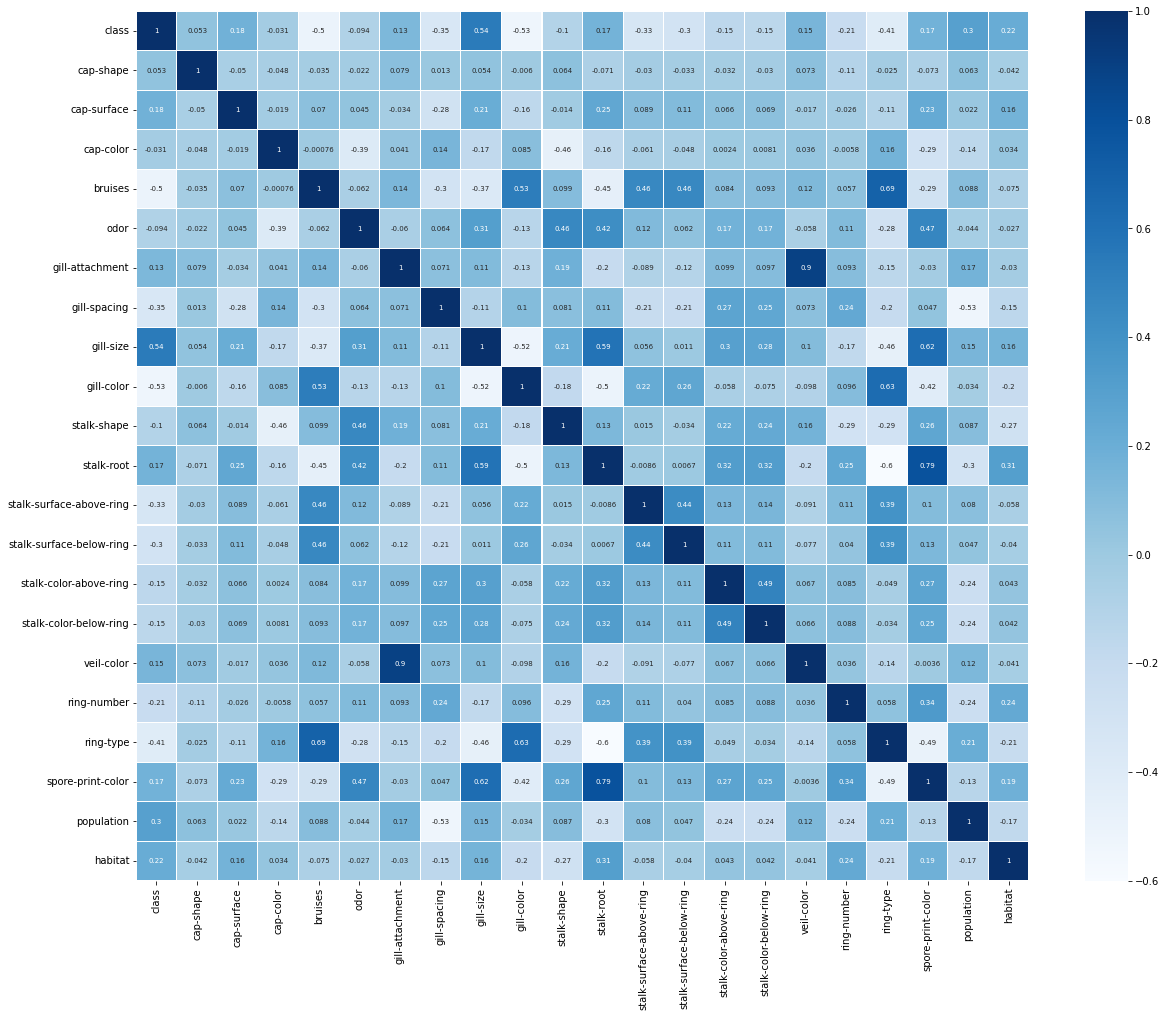

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),linewidths=.1,cmap="Blues", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

Before we learned that attribute has 2480 missing values it is too much recordes to be deleted. From correlation above we see that correllation between this attribute and class is only 0.17, not the smallest but small enought that deletion of it will not have crucial impat on class. Also stalk roots is not something people usually look in mushrooms so if there was f.e. application witch would used this model for muschroom recognison probably this attribut will be moustly ignored by users


So it will be dropped

In [ ]:
df=df.drop(["stalk-root"],axis=1)

The biggest correlation to class is with gill-color and gill-size so let's have closer look to it 

gill-color:

black=k,

brown=n,

buff=b,

chocolate=h,

gray=g, 

green=r,

orange=o,

pink=p,

purple=u,

red=e, 

white=w,

yellow=y

['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']=>[ 0  1  2  3  4  5  6  7  8  9 10 11]

In [ ]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


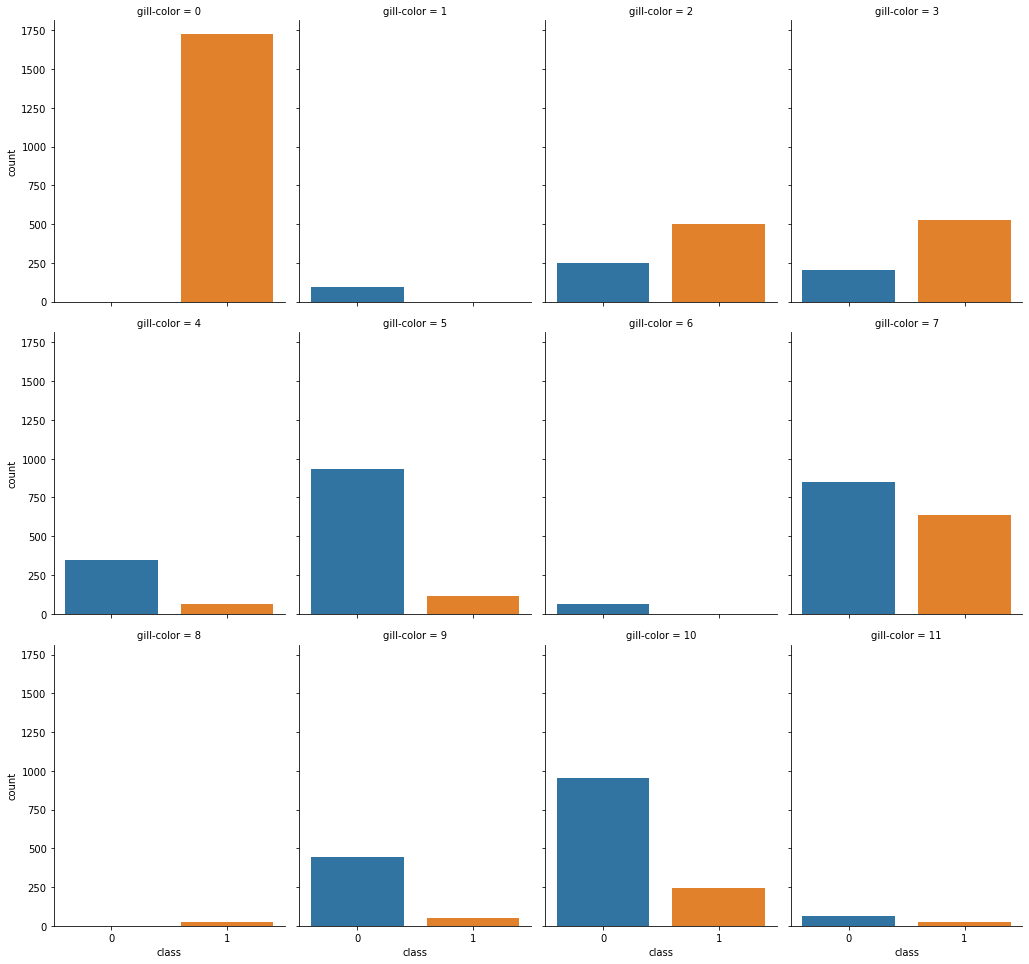

In [ ]:
new_var = df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']>=0]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

gill-size:

broad=b,

narrow=n

['b' 'n']=>[0 1]

In [ ]:
df[['class', 'gill-size']].groupby(['gill-size'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-size,class
1,1,0.885350
0,0,0.301497


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


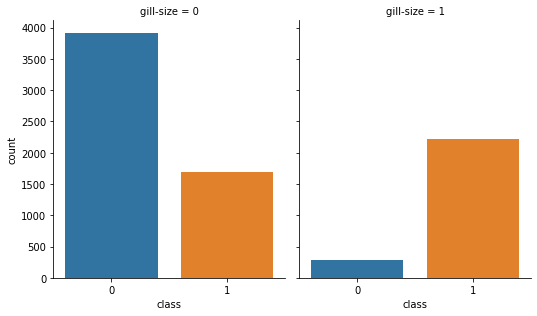

In [ ]:
new_var = df[['class', 'gill-size']]
new_var = new_var[new_var['gill-size']>=0]
sns.factorplot('class', col='gill-size', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

# Model Building

Splitting the dataset into the Training and Test set and checking the best Random State



[91.31, 93.12, 91.12, 91.62, 91.5, 91.69, 92.0, 91.38, 93.69, 91.88, 92.94, 93.12, 90.75, 91.38, 92.12, 92.75, 92.62, 91.38, 91.5, 92.88, 92.12, 91.0, 91.56, 91.75, 90.31, 90.75, 91.38, 91.81, 93.62, 91.5, 93.0, 92.38, 92.75, 92.25, 93.06, 92.81, 92.12, 91.5, 92.44, 92.19, 92.5, 92.56, 92.12, 92.56, 92.0, 92.56, 93.12, 92.0, 92.19, 91.38, 92.31, 91.19, 92.38, 91.94, 92.5, 91.56, 91.69, 93.38, 92.5, 92.81, 92.81, 91.0, 92.88, 92.62, 93.62, 93.06, 91.81, 92.0, 92.12, 92.19, 91.69, 91.69, 90.88, 91.75, 91.88, 93.0, 92.88, 91.62, 93.25, 91.75, 92.5, 91.94, 92.19, 92.12, 93.12, 92.19, 93.19, 92.25, 92.06, 91.44, 93.81, 93.06, 90.69, 91.88, 92.5, 92.12, 93.06, 91.81, 91.12, 91.06, 93.25, 92.75, 91.88, 91.81, 89.31, 91.81, 92.25, 91.56, 91.06, 92.56, 90.62, 91.06, 93.75, 91.44, 92.88, 91.5, 92.62, 92.44, 92.0, 90.31, 91.88, 91.56, 92.38, 91.75, 91.44, 92.56, 91.38, 92.69, 92.5, 92.5, 92.06, 92.12, 92.81, 92.38, 91.06, 92.0, 91.94, 92.0, 92.94, 94.56, 90.69, 90.94, 92.31, 92.31, 91.19, 92.06, 

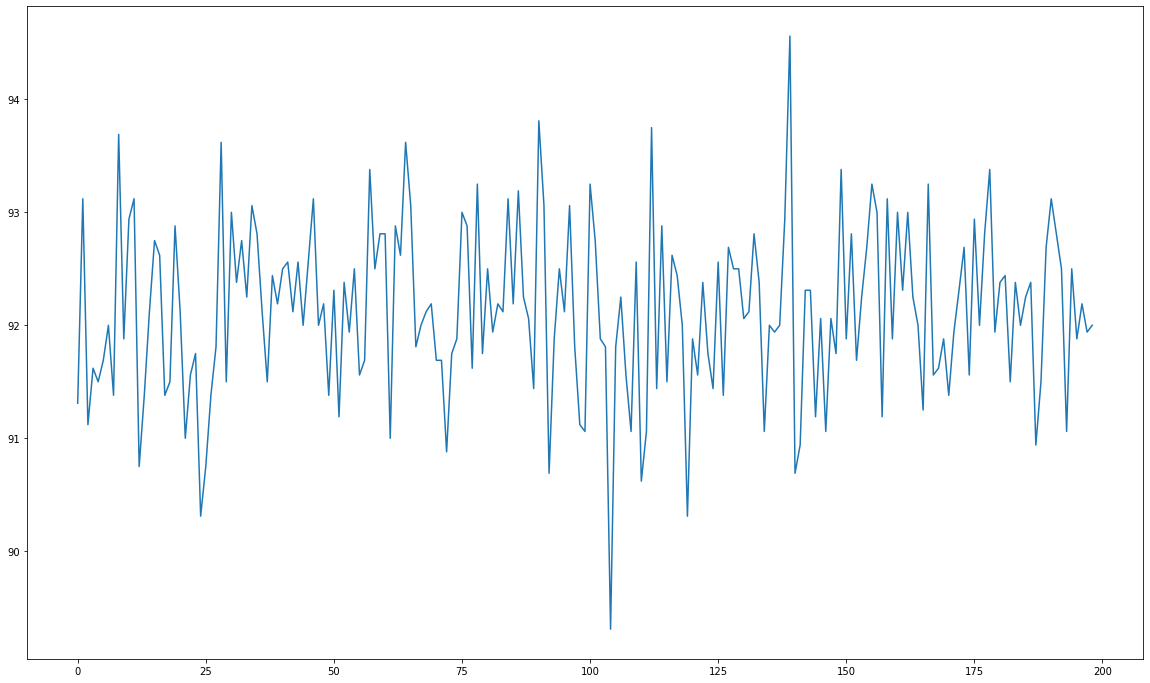

In [ ]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

values = []
for i in range(1,200):
  rng = np.random.RandomState(i)
  permutation = list(range(len(df)))
  rng.shuffle(permutation)

#size of test set 
  testSize = 1600

#split into the Training and Test set
  Xtrain = X.iloc[permutation[:-testSize]]
  ytrain = y.iloc[permutation[:-testSize]]

  Xtest = X.iloc[permutation[-testSize:]]
  ytest = y.iloc[permutation[-testSize:]]

  nb = GaussianNB()
  nb.fit(Xtrain, ytrain)
  values.append(round(nb.score(Xtest, ytest)*100, 2))
print(values)

print("Lowest average accuracy:",min(values))
print("Highest average accuracy:",max(values))
print("For Random State =",values.index(max(values))+1)
plt.figure(figsize=(20,12))
plt.plot(values)

In [ ]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

#generating a random permutation
rng = np.random.RandomState(140)
permutation = list(range(len(df)))
rng.shuffle(permutation)

#size of test set 
testSize = 1600

#split into the Training and Test set 
Xtrain = X.iloc[permutation[:-testSize]]
ytrain = y.iloc[permutation[:-testSize]]

Xtest = X.iloc[permutation[-testSize:]]
ytest = y.iloc[permutation[-testSize:]]

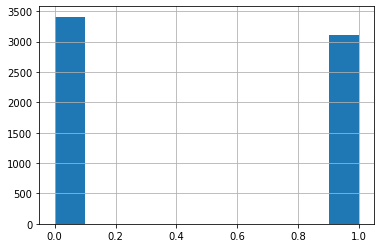

In [ ]:
ytrain.hist()

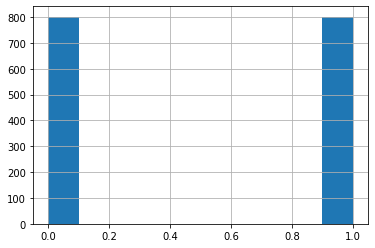

In [ ]:
ytest.hist()

Fitting Naive Bayes classifier to the Training set and Training Results

In [ ]:
nb = GaussianNB()
nb.fit(Xtrain, ytrain)

GaussianNB()

# Model evaluation

In [ ]:
print("Test Accuracy: {}%".format(round(nb.score(Xtest, ytest)*100, 2)))

Test Accuracy: 94.56%


Confusion Matrix

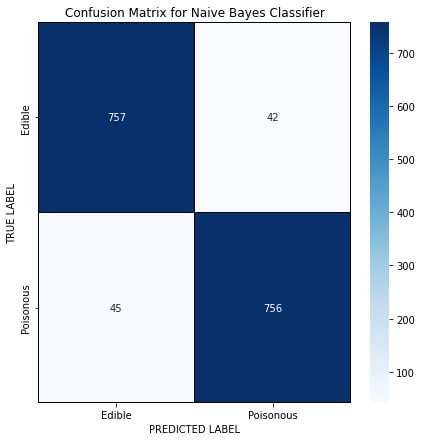

In [ ]:
ypred = nb.predict(Xtest)
cm = confusion_matrix(ytest, ypred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

Classification Report

In [ ]:
print("Naive Bayes Classifier report: \n", classification_report(ytest, ypred))

Naive Bayes Classifier report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       799
           1       0.95      0.94      0.95       801

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In this data set feature scaling will not be much of a requirement as the features already have a low variance

In [ ]:
df.max()

class                        1
cap-shape                    5
cap-surface                  3
cap-color                    9
bruises                      1
odor                         8
gill-attachment              1
gill-spacing                 1
gill-size                    1
gill-color                  11
stalk-shape                  1
stalk-surface-above-ring     3
stalk-surface-below-ring     3
stalk-color-above-ring       8
stalk-color-below-ring       8
veil-color                   3
ring-number                  2
ring-type                    4
spore-print-color            8
population                   5
habitat                      6
dtype: int64

In [ ]:
scale = StandardScaler()

scaledXtrain = scale.fit_transform(Xtrain)
scaledXtest = scale.fit_transform(Xtest)

nb_s = GaussianNB()
nb_s.fit(scaledXtrain, ytrain)

print("Test Accuracy: {}%".format(round(nb_s.score(scaledXtest, ytest)*100, 2)))

Test Accuracy: 94.69%


In [ ]:
ypred_s = nb_s.predict(scaledXtest)
print("Naive Bayes Classifier report for scaled data: \n", classification_report(ytest, ypred_s))

Naive Bayes Classifier report for scaled data: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       799
           1       0.95      0.94      0.95       801

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



# Conclusion

Through the use of Confusion matrix, we can clearly see that our test data is balanced, so our model is predicting well. 

In this case scaling was unnecessary.